# ***VOTING ENSEMBLE***

___

> ## Soft Voting

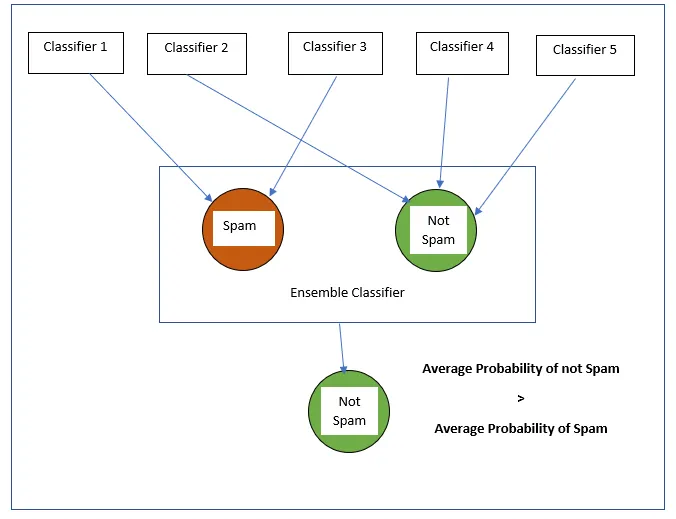


___

> ## Hard Voting
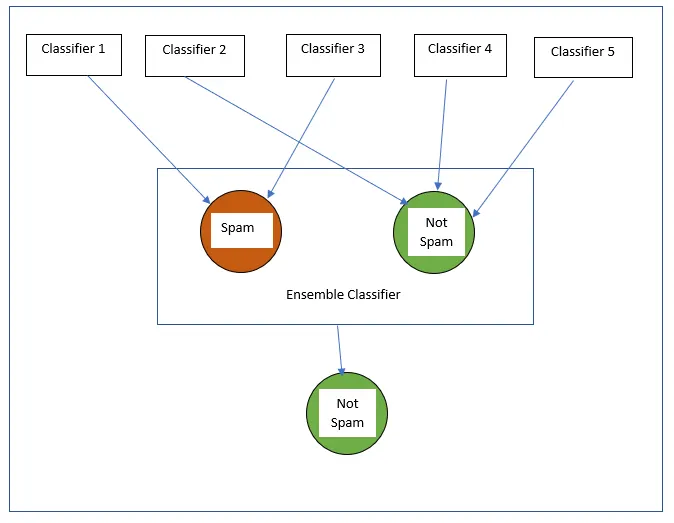

In [1]:
import seaborn as sns

data = sns.load_dataset('iris')

In [2]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


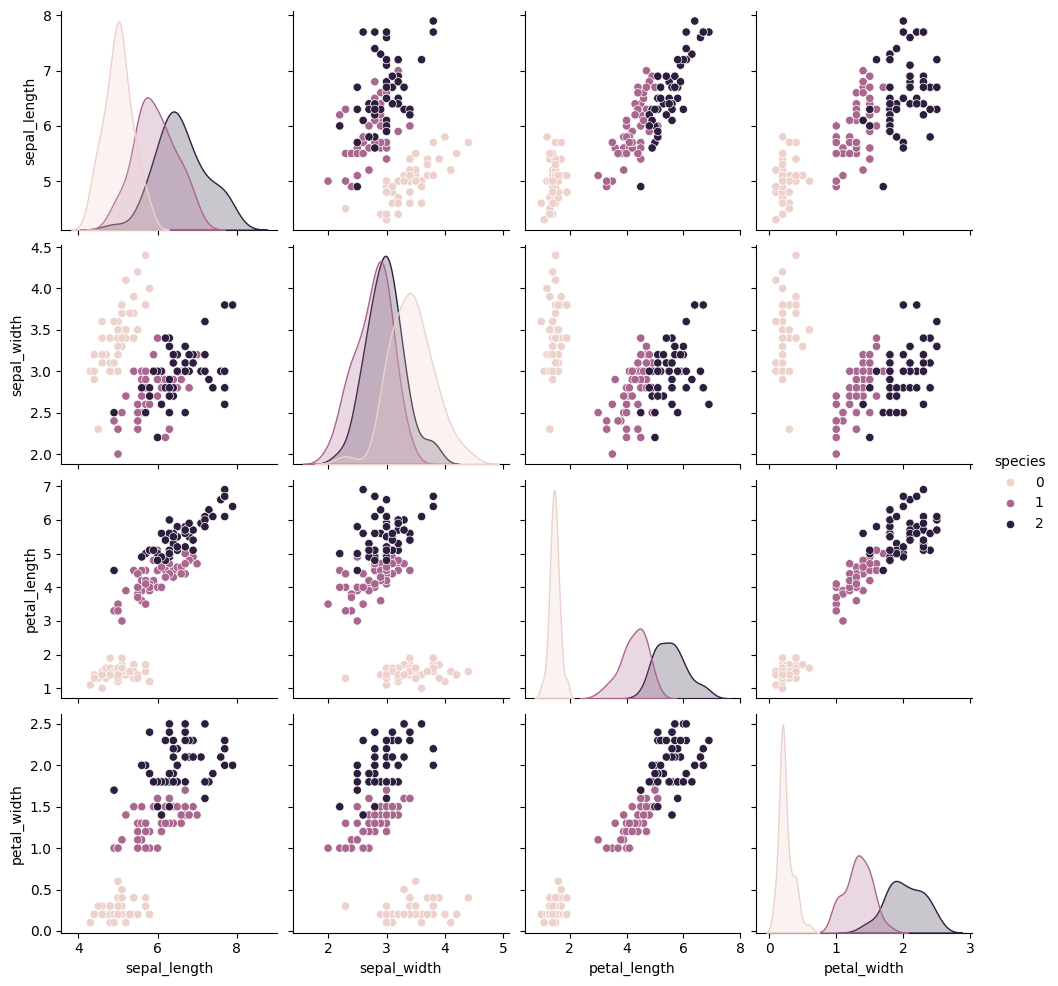

In [6]:
sns.pairplot(data, hue='species')

In [9]:
data = data[data['species'] != 0][['sepal_length', 'sepal_width', 'species']]

In [10]:
data.shape

(100, 3)

In [30]:
x = data.drop('species', axis=1)
y = data['species']

In [31]:
x.shape, y.shape

((100, 2), (100,))

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [33]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [34]:
# you need to pass estimators list of (str, estimators)tuples
estimators = [('lr', clf1), ('knn', clf2), ('rf', clf3)] 

In [35]:
import numpy as np

In [36]:
x.shape, y.shape

((100, 2), (100,))

In [37]:
for estimator in estimators:
    scores = cross_val_score(estimator[1], x, y, cv=10, scoring='accuracy')
    print(estimator[0], np.round(np.mean(scores), 2))

lr 0.75
knn 0.62
rf 0.62


In [38]:
from sklearn.ensemble import VotingClassifier

> # Hard Voting

In [44]:
vc = VotingClassifier(estimators=estimators, voting='hard')
np.mean(cross_val_score(vc, x, y, cv=10, scoring='accuracy'))

np.float64(0.6699999999999999)

> # Soft Voting

In [45]:
vc = VotingClassifier(estimators=estimators, voting='soft')
np.mean(cross_val_score(vc, x, y, cv=10, scoring='accuracy'))

np.float64(0.6599999999999999)

> # Weights in Voting

In [58]:
# weights.size = estimator.size
vc = VotingClassifier(estimators=estimators, voting='soft', weights=[10, 2, 2])
np.mean(cross_val_score(vc, x, y, cv=10, scoring='accuracy'))

np.float64(0.72)

In [52]:
for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            vc = VotingClassifier(estimators=estimators, voting='soft', weights=[i, j, k])
            print('for i={} j={} k={}'.format(i, j, k), 'score=',np.mean(cross_val_score(vc, x, y, cv=10, scoring='accuracy')))

for i=1 j=1 k=1 score= 0.6399999999999999
for i=1 j=1 k=2 score= 0.6399999999999999
for i=1 j=1 k=3 score= 0.6100000000000001
for i=1 j=2 k=1 score= 0.65
for i=1 j=2 k=2 score= 0.6399999999999999
for i=1 j=2 k=3 score= 0.63
for i=1 j=3 k=1 score= 0.6399999999999999
for i=1 j=3 k=2 score= 0.6399999999999999
for i=1 j=3 k=3 score= 0.63
for i=2 j=1 k=1 score= 0.6799999999999999
for i=2 j=1 k=2 score= 0.66
for i=2 j=1 k=3 score= 0.63
for i=2 j=2 k=1 score= 0.6799999999999999
for i=2 j=2 k=2 score= 0.63
for i=2 j=2 k=3 score= 0.6499999999999999
for i=2 j=3 k=1 score= 0.67
for i=2 j=3 k=2 score= 0.65
for i=2 j=3 k=3 score= 0.6399999999999999
for i=3 j=1 k=1 score= 0.7000000000000001
for i=3 j=1 k=2 score= 0.67
for i=3 j=1 k=3 score= 0.63
for i=3 j=2 k=1 score= 0.7
for i=3 j=2 k=2 score= 0.6599999999999999
for i=3 j=2 k=3 score= 0.6599999999999999
for i=3 j=3 k=1 score= 0.6900000000000001
for i=3 j=3 k=2 score= 0.6599999999999999
for i=3 j=3 k=3 score= 0.65


># Same Algo

In [59]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [63]:
x, y = make_classification(n_features=20, n_informative=15, n_classes=3, n_samples=1000)

In [65]:
svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

In [66]:
estimators = [('svm1', svm1), ('svm2', svm2), ('svm3', svm3), ('svm4', svm4), ('svm5', svm5)]

In [67]:
for e in estimators:
    sc = cross_val_score(e[1], x, y, cv=10, scoring='accuracy')
    print(e[0], np.mean(sc))

svm1 0.7839999999999999
svm2 0.8219999999999998
svm3 0.8530000000000001
svm4 0.751
svm5 0.708


In [68]:
vc1 = VotingClassifier(estimators=estimators, voting='soft')
np.mean(cross_val_score(vc1, x, y, cv=10, scoring='accuracy'))

np.float64(0.8889999999999999)